In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [59]:
df_1 = pd.read_csv('dataset/raw_data1.csv')
df_2 = pd.read_csv('dataset/raw_data2.csv')
df_2

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases
0,17307.0,NaN,20/04/2020,NaN,48.0,M,NaN,Bhadrak,Odisha,OR,...,Details awaited,NaN,NaN,NaN,20/04/2020,https://twitter.com/the_hindu/status/125205985...,NaN,NaN,NaN,1
1,17308.0,NaN,20/04/2020,NaN,55.0,M,NaN,Bhadrak,Odisha,OR,...,Details awaited,NaN,NaN,NaN,20/04/2020,https://twitter.com/the_hindu/status/125205985...,NaN,NaN,NaN,1
2,17309.0,NaN,20/04/2020,NaN,57.0,M,NaN,Bhadrak,Odisha,OR,...,Details awaited,NaN,NaN,NaN,20/04/2020,https://twitter.com/the_hindu/status/125205985...,NaN,NaN,NaN,1
3,17310.0,NaN,20/04/2020,NaN,58.0,M,NaN,Bhadrak,Odisha,OR,...,Details awaited,NaN,NaN,NaN,20/04/2020,https://twitter.com/the_hindu/status/125205985...,NaN,NaN,NaN,1
4,17311.0,NaN,20/04/2020,NaN,66.0,M,NaN,Bhadrak,Odisha,OR,...,Details awaited,NaN,NaN,NaN,20/04/2020,https://twitter.com/the_hindu/status/125205985...,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10814,NaN,NaN,22/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
10815,NaN,NaN,24/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10816,NaN,NaN,24/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
10817,NaN,NaN,25/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [66]:
age.head()

,Age Bracket
0,48.0
1,55.0
2,57.0
3,58.0
4,66.0


In [67]:
df_1.describe()

,Patient Number,Estimated Onset Date,Num cases
count,17306.000000,0.0,17364.000000
mean,8653.500000,NaN,0.996660
std,4995.956215,NaN,0.488526
min,1.000000,NaN,-34.000000
25%,4327.250000,NaN,1.000000
50%,8653.500000,NaN,1.000000
75%,12979.750000,NaN,1.000000
max,17306.000000,NaN,34.000000


In [68]:
df_2.describe()

,Patient Number,Estimated Onset Date,Age Bracket,Backup Notes,Num cases
count,10585.000000,0.0,676.000000,0.0,10819.000000
mean,22599.000000,NaN,35.619379,NaN,0.978371
std,3055.770634,NaN,17.191295,NaN,14.024517
min,17307.000000,NaN,0.300000,NaN,-602.000000
25%,19953.000000,NaN,23.000000,NaN,1.000000
50%,22599.000000,NaN,33.500000,NaN,1.000000
75%,25245.000000,NaN,47.000000,NaN,1.000000
max,27891.000000,NaN,98.000000,NaN,602.000000


In [7]:
date = df_1['Date Announced']
date

0        30/01/2020
1        02/02/2020
2        03/02/2020
3        02/03/2020
4        02/03/2020
            ...    
17359    16/04/2020
17360    18/04/2020
17361    18/04/2020
17362    19/04/2020
17363    19/04/2020
Name: Date Announced, Length: 17364, dtype: object

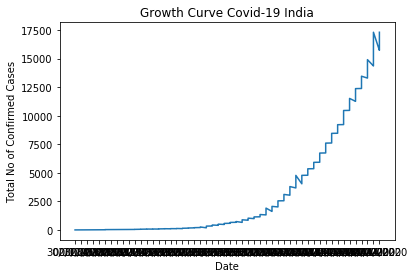

In [10]:
plt.plot(data,df_1['Patient Number'])
plt.xlabel('Date')
plt.ylabel('Total No of Confirmed Cases')
plt.title('Growth Curve Covid-19 India')
plt.show()